# Artificial matrix study

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '61a67e487f088b762b8239174b05db2afc675d23'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [3]:
from network import BCPNNFast, NetworkManager
from plotting_functions import plot_winning_pattern
from analysis_functions import calculate_recall_success, calculate_timings
from analysis_functions import create_artificial_matrix
from plotting_functions import plot_weight_matrix, plot_network_activity_angle

## A simple example

In [31]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 2
decay_factor = 0.1
diagonal_zero = True
sequence_decay = 1.0
diagonal_across = True
diagonal_value = 1.01
inhibition = -1.0
w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value, sequence_decay=sequence_decay)
w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                         0, diagonal_zero, diagonal_across, diagonal_value)

# Create the network
nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
nn.w = w
nn.w_ampa = w_ampa
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
manager.stored_patterns_indexes = patterns_indexes
manager.n_patterns = number_of_patterns

#### Weight matrices

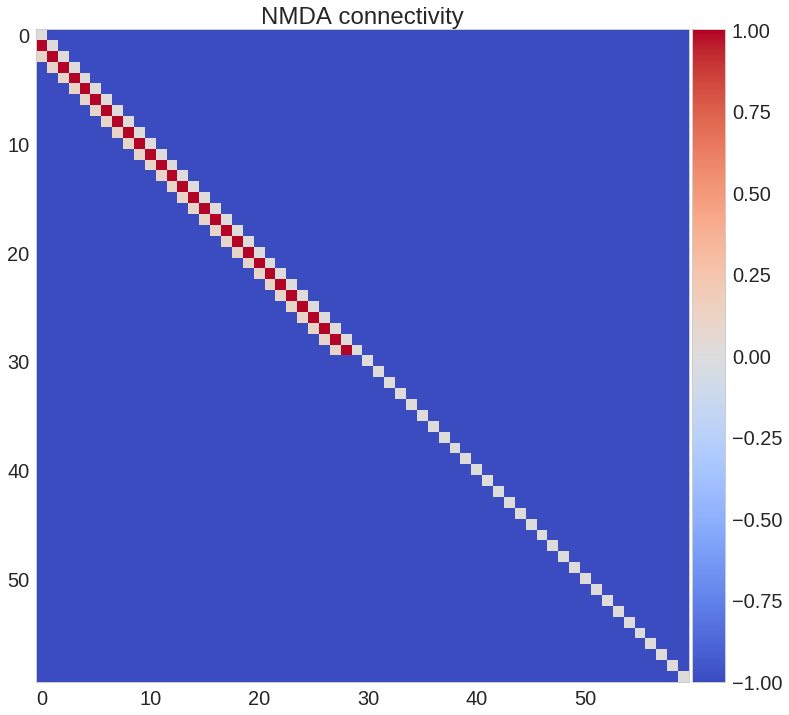

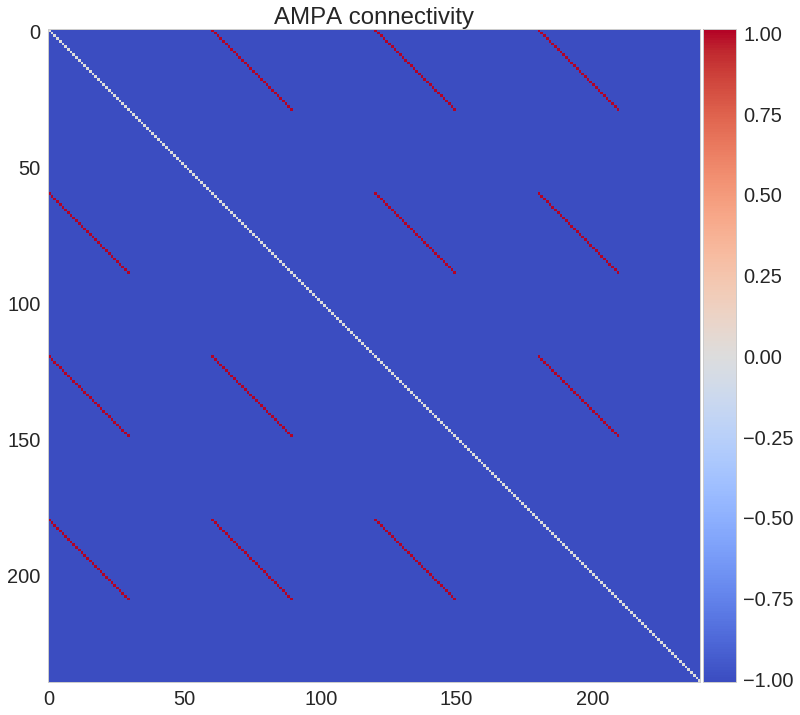

In [32]:
plot_weight_matrix(nn, ampa=False, one_hypercolum=True)
plot_weight_matrix(nn, ampa=True)

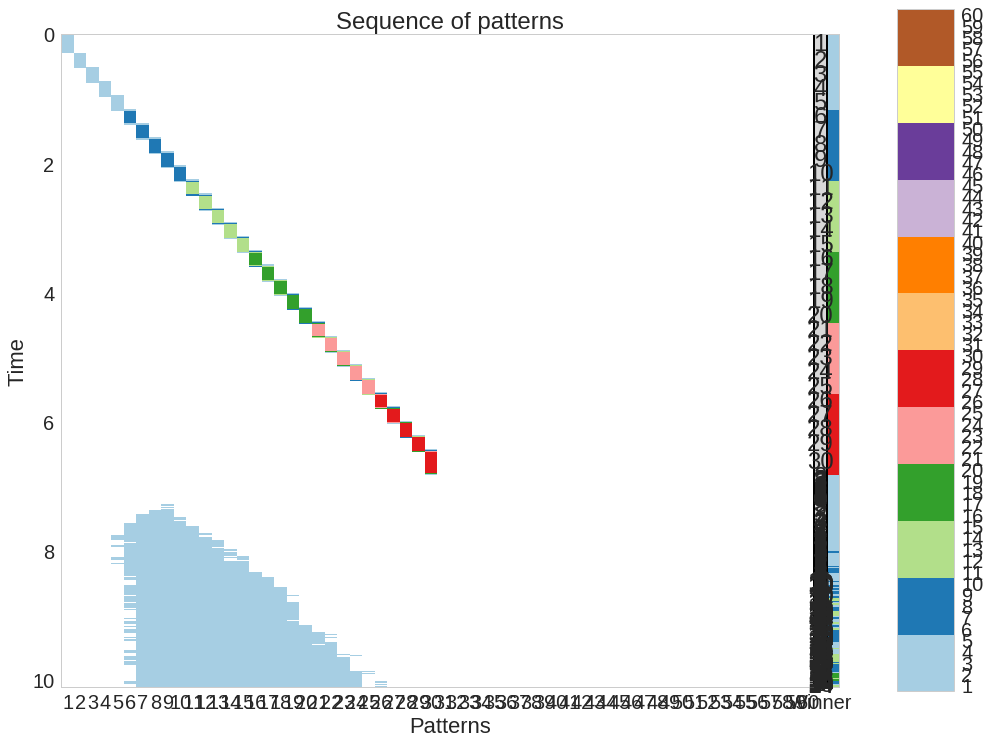

In [33]:
### Recall
T_cue = 0.100
I_cue = 0
T_recall = 10.0
manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)
plot_winning_pattern(manager)

#### Recall time

In [34]:
timings = calculate_timings(manager)
timings = [timings[index][1] for index in patterns_indexes]

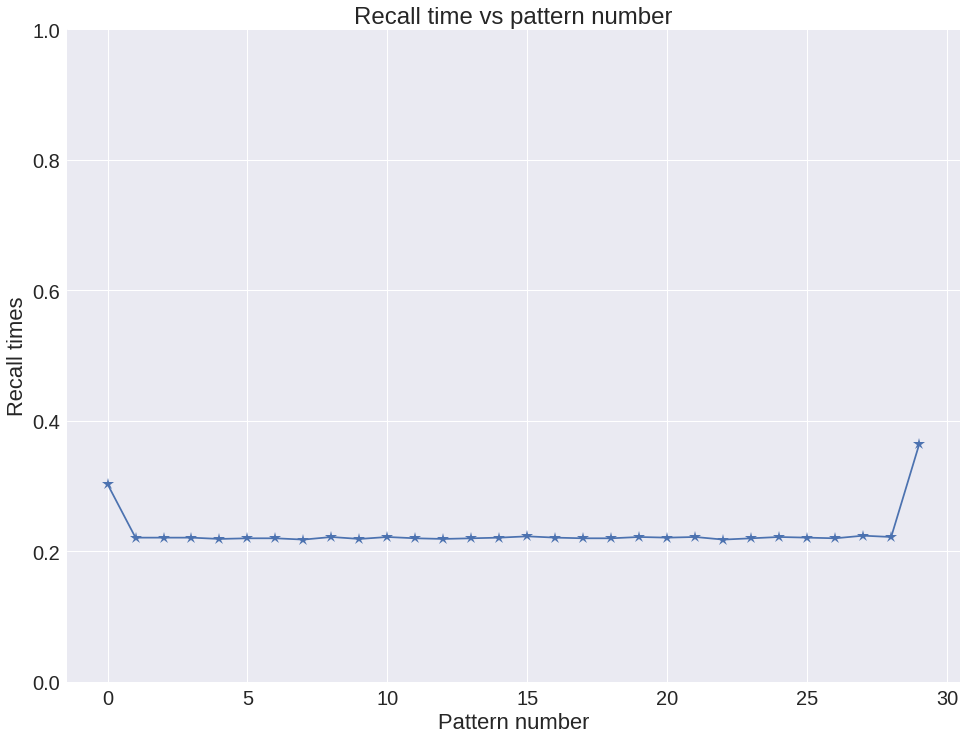

In [35]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(patterns_indexes, timings, '*-', markersize=13)
ax.set_title('Recall time vs pattern number')
ax.set_ylabel('Recall times')
ax.set_xlabel('Pattern number')
ax.set_ylim([0, 1.0]);

## Sequence intensity decay

In [9]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 40
patterns_indexes = [i for i in range(number_of_patterns)]



In [10]:
# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.5
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 20.0
sequence_decay_ranges = np.arange(0.5, 1.1, 0.05)
recall_times_sequence = []

In [11]:
for sequence_decay in sequence_decay_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value, sequence_decay=sequence_decay)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes]
    recall_times_sequence.append(timings)

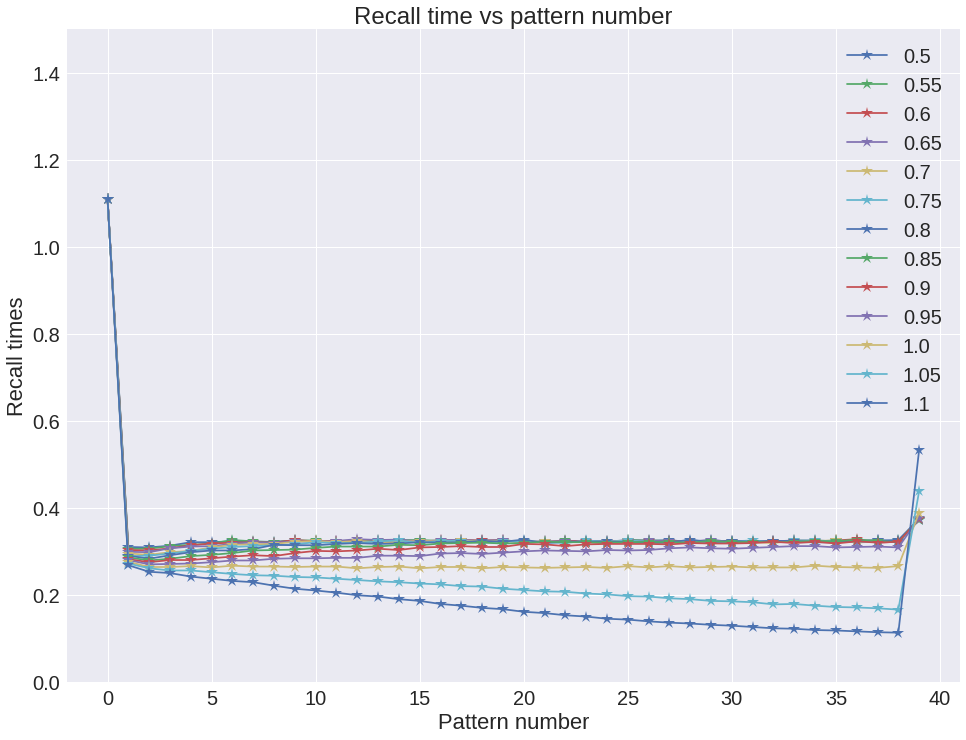

In [12]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for index, timings in enumerate(recall_times_sequence):
    ax.plot(patterns_indexes, timings, '*-', markersize=13, label=str(sequence_decay_ranges[index]))

ax.legend()
ax.set_ylabel('Recall times')
ax.set_xlabel('Pattern number')
ax.set_title('Recall time vs pattern number')
ax.set_ylim([0, 1.5]);

* if sequence decay > 1 the recalled elements last shorter
* if sequence decay < 1 the recall elements last a little bit longer.

## Weight intensity variation

In [13]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
value_ranges = np.logspace(-2, 2, 20)
mean_recall_time = []
std_recall_time = []

In [14]:
for value in value_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

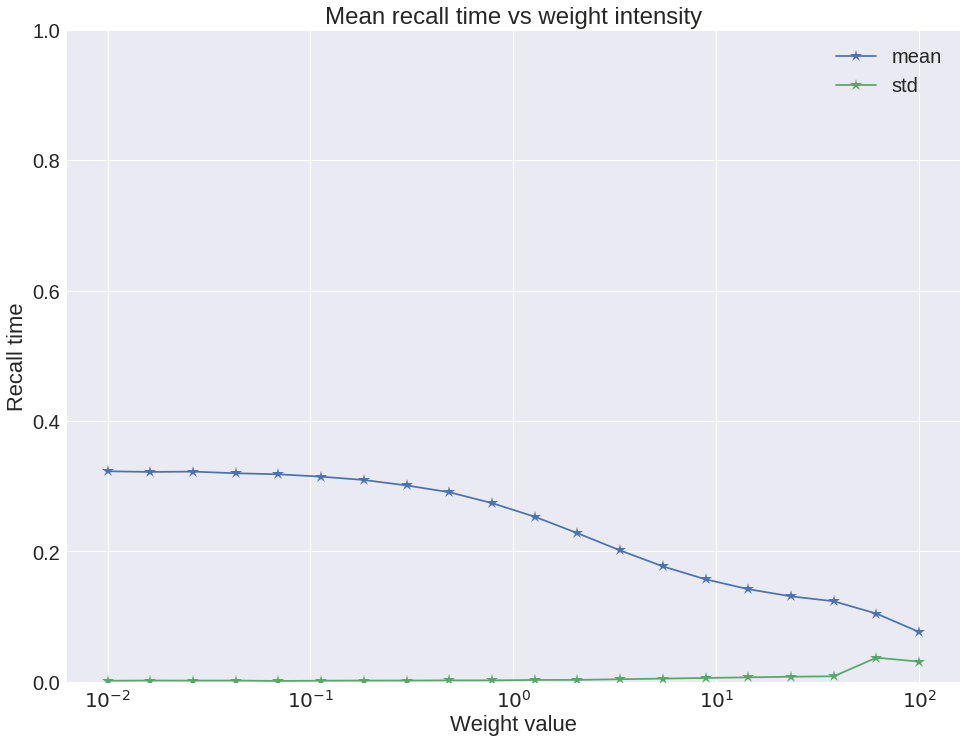

In [15]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(value_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs weight intensity')
ax.set_xlabel('Weight value')
ax.set_ylabel('Recall time')
ax.set_xscale('log')
ax.set_ylim([0, 1.0])

ax.legend();

The weaker the elements are the shorter the recall times. This can be explained by the fact that if the trasition probability (strength of the element) is too strong, then this makes the neuron stay in the current state for little time.

### Turning diagonal effects for NMDA

In [16]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
value_ranges = np.logspace(-2, 2, 20)
mean_recall_time = []
std_recall_time = []

In [17]:
for value in value_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, False, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

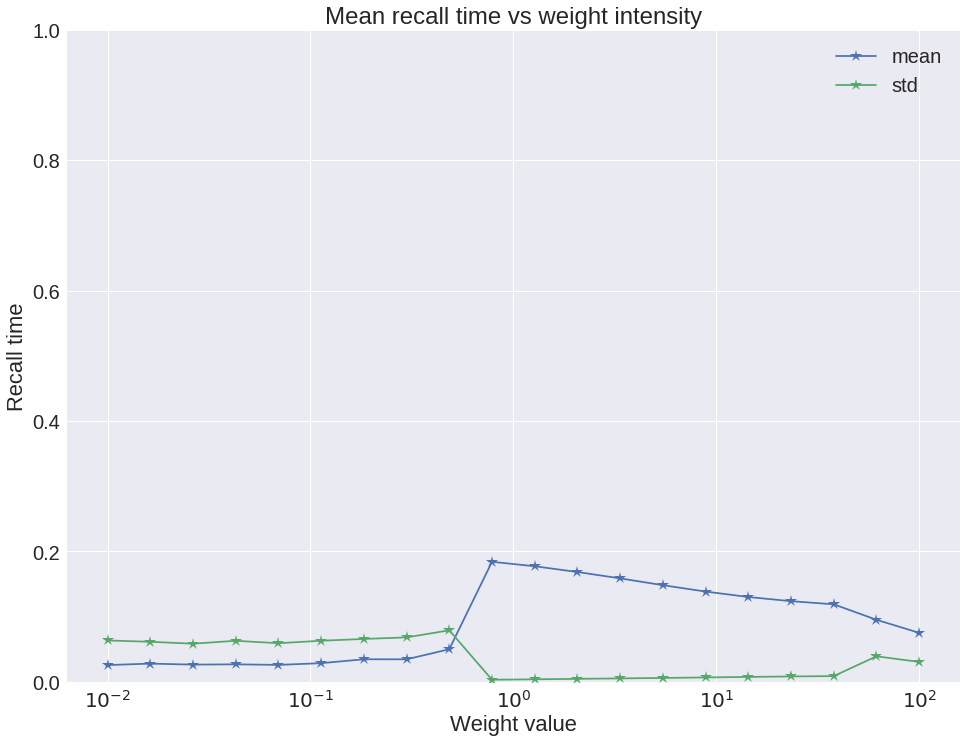

In [18]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(value_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs weight intensity')
ax.set_xlabel('Weight value')
ax.set_ylabel('Recall time')
ax.set_xscale('log')
ax.set_ylim([0, 1.0])

ax.legend();

The connectivity among the patterns in the sequence behaves weird for small values (without the cross effect from the other hypercolumns). For the values of 1 and above it behaves normally, why?

## Inhibition strength

In [19]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 150
inhibition_ranges = -1 * np.logspace(-2, 1.0, 15)
mean_recall_time = []
std_recall_time = []

In [20]:
for inhibition in inhibition_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

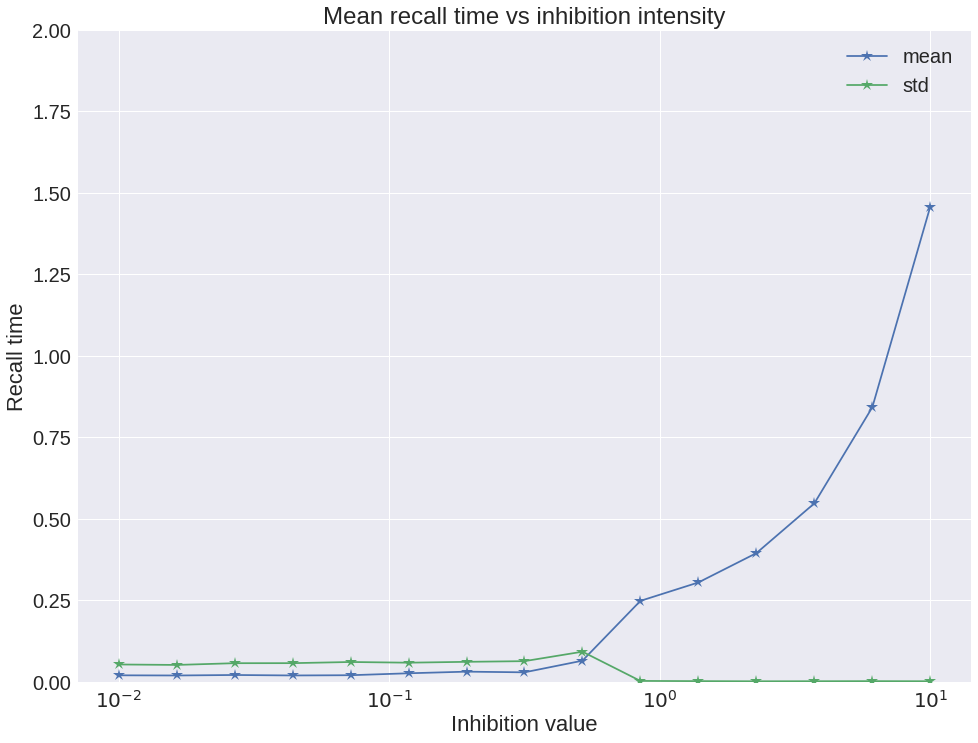

In [21]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(-inhibition_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(-inhibition_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs inhibition intensity')
ax.set_xlabel('Inhibition value')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 2.0])
ax.set_xscale('log')

ax.legend();

### Differences in extension

In [22]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.3
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
extension_range = np.arange(1, 5, 1)
mean_recall_time = []
std_recall_time = []

In [23]:
for extension in extension_range:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

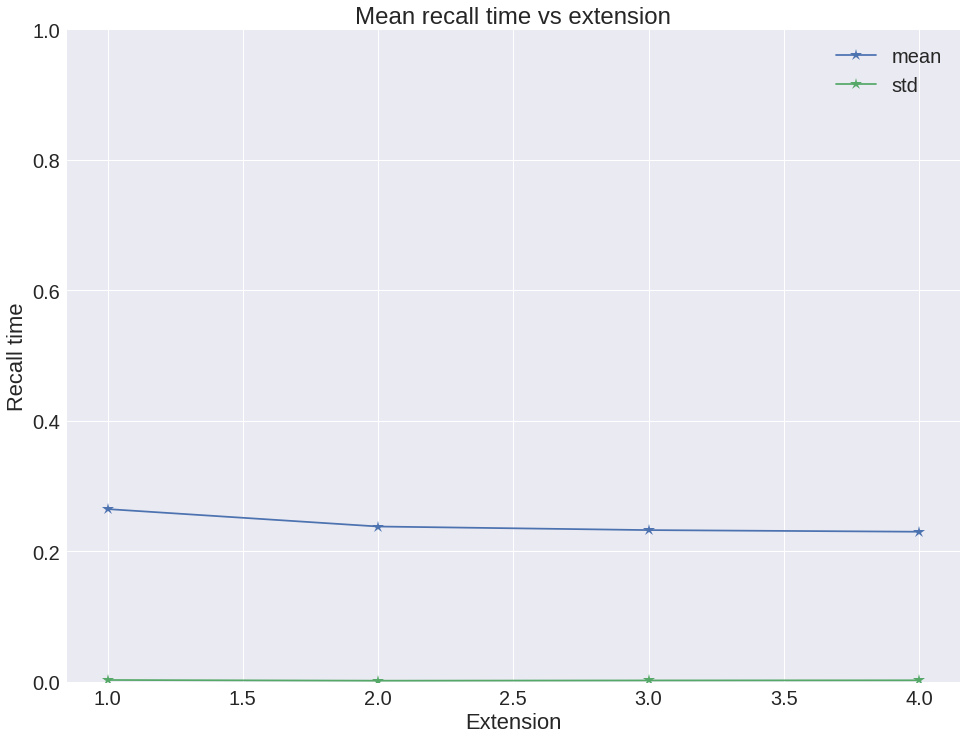

In [24]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(extension_range, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(extension_range, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs extension')
ax.set_xlabel('Extension')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 1.0])

ax.legend();

#### Diagonal values

In [25]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.5
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 20.0
diagonal_ranges = np.arange(0.5, 1.5, 0.1)
mean_recall_time = []
std_recall_time = []

In [26]:
for diagonal_value in diagonal_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value)
    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             0, diagonal_zero, diagonal_across, diagonal_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

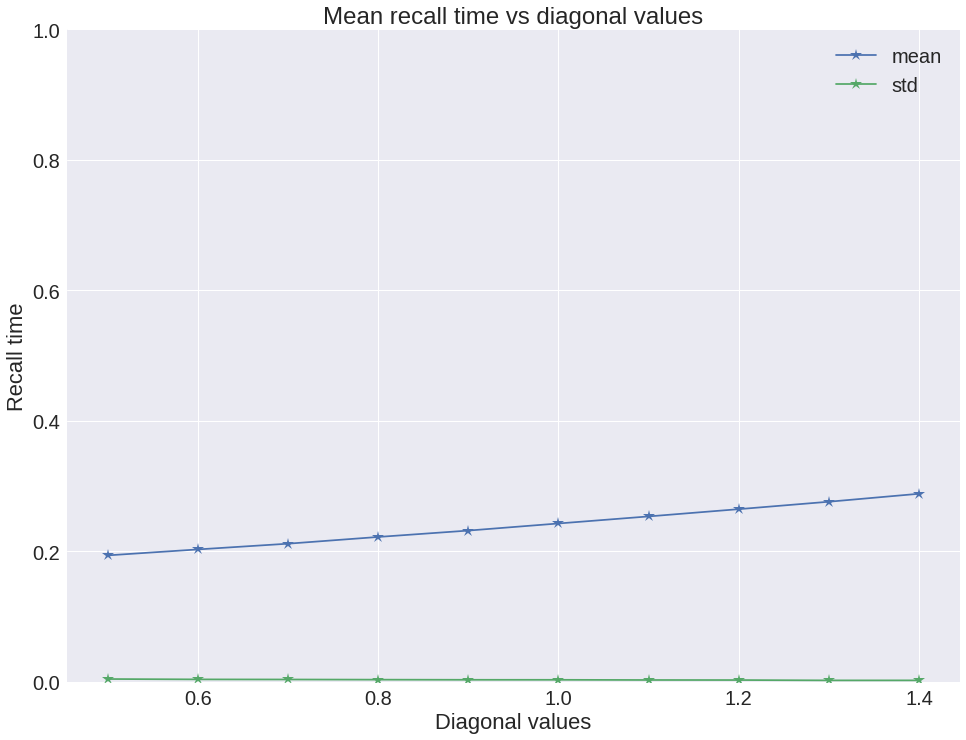

In [27]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(diagonal_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(diagonal_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs diagonal values')
ax.set_xlabel('Diagonal values')
ax.set_ylabel('Recall time')
ax.set_ylim([0, 1.0])

ax.legend();

## Include free attractor

In [28]:
# Network parameters
minicolumns = 60
hypercolumns = 4
number_of_patterns = 30
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
value = 1.0
extension = 1
decay_factor = 0.1
diagonal_zero = True
diagonal_across = True
diagonal_value = 1.2
inhibition = -1
sequence_decay = 1.0
free_attractor = True
free_attractor_value = 0.5

# Recall
T_cue = 1.0
I_cue = 0
T_recall = 10.0
value_ranges = np.logspace(-2, 2, 20)
mean_recall_time = []
std_recall_time = []

In [29]:
for value in value_ranges:
    w = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                             extension, diagonal_zero, diagonal_across, diagonal_value, sequence_decay=sequence_decay,
                             free_attractor=free_attractor, free_attractor_value=free_attractor_value)

    w_ampa = create_artificial_matrix(hypercolumns, minicolumns, number_of_patterns, value, inhibition, decay_factor,
                                  0, diagonal_zero, diagonal_across, diagonal_value,
                                  free_attractor=free_attractor, free_attractor_value=free_attractor_value)

    # Create the network
    nn = BCPNNFast(hypercolumns=hypercolumns, minicolumns=minicolumns)
    nn.w = w
    nn.w_ampa = w_ampa
    manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
    manager.stored_patterns_indexes = patterns_indexes
    manager.n_patterns = number_of_patterns

    manager.run_network_recall(T_recall=T_recall, I_cue=I_cue, T_cue=T_cue)

    timings = calculate_timings(manager)
    timings = [timings[index][1] for index in patterns_indexes[1:-1]]
    mean_recall_time.append(np.mean(timings))
    std_recall_time.append(np.std(timings))

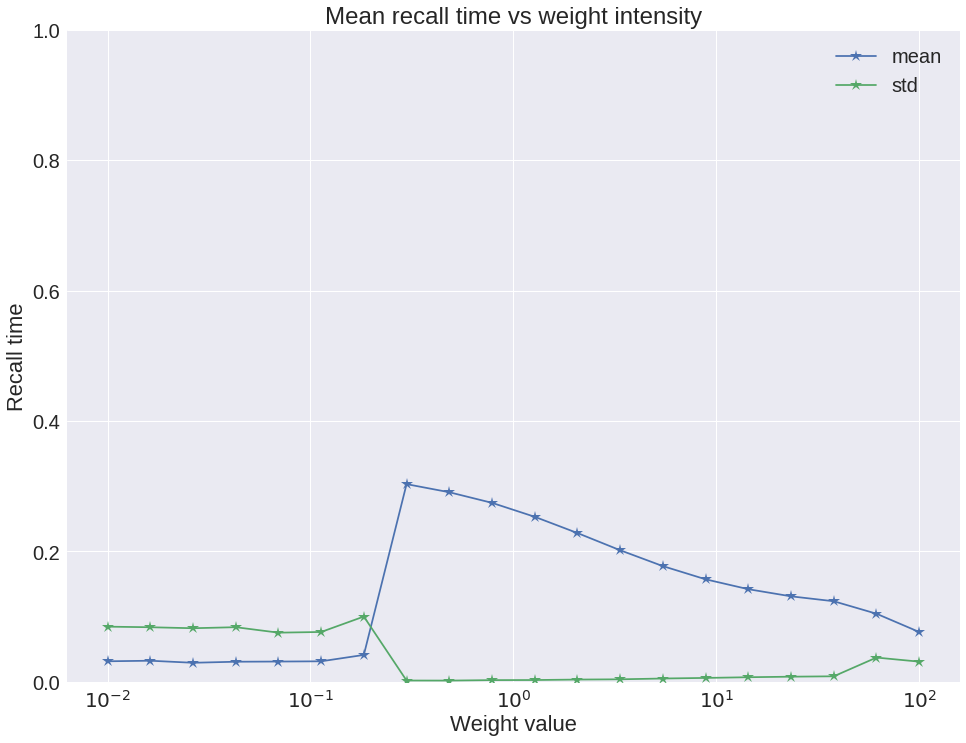

In [30]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(value_ranges, mean_recall_time, '*-', markersize=13, label='mean')
ax.plot(value_ranges, std_recall_time, '*-', markersize=13, label='std')
ax.set_title('Mean recall time vs weight intensity')
ax.set_xlabel('Weight value')
ax.set_ylabel('Recall time')
ax.set_xscale('log')
ax.set_ylim([0, 1.0])

ax.legend();